In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
import warnings

warnings.filterwarnings(action='ignore')

In [105]:
file_path = './data/market-price.csv'
df = pd.read_csv(file_path, names=['day','price'])

In [106]:
df

,day,price
0,2010-08-17,0.00
1,2010-08-20,0.07
2,2010-08-23,0.07
3,2010-08-26,0.07
4,2010-08-29,0.06
...,...,...
1373,2021-11-26,58935.45
1374,2021-11-29,57292.28
1375,2021-12-02,57229.76
1376,2021-12-05,49253.86


In [107]:
train_df = df.iloc[656:1373]
train_df

,day,price
656,2016-01-06,432.43
657,2016-01-09,452.64
658,2016-01-12,447.98
659,2016-01-15,429.55
660,2016-01-18,380.16
...,...,...
1368,2021-11-11,64976.73
1369,2021-11-14,64420.94
1370,2021-11-17,60172.26
1371,2021-11-20,58133.02


In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 656 to 1372
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     717 non-null    object 
 1   price   717 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.3+ KB


In [109]:
pd.to_datetime(train_df['day'])

656    2016-01-06
657    2016-01-09
658    2016-01-12
659    2016-01-15
660    2016-01-18
          ...    
1368   2021-11-11
1369   2021-11-14
1370   2021-11-17
1371   2021-11-20
1372   2021-11-23
Name: day, Length: 717, dtype: datetime64[ns]

In [110]:
train_df.set_index('day', inplace=True)
train_df

,price
day,
2016-01-06,432.43
2016-01-09,452.64
2016-01-12,447.98
2016-01-15,429.55
2016-01-18,380.16
...,...
2021-11-11,64976.73
2021-11-14,64420.94
2021-11-17,60172.26


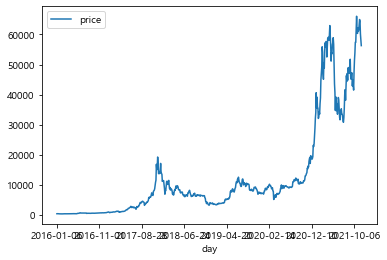

In [111]:
train_df.plot()
plt.show()

In [112]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [113]:
model = ARIMA(train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)

In [114]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  716
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6171.421
Method:                       css-mle   S.D. of innovations           1338.817
Date:                Fri, 10 Dec 2021   AIC                          12354.841
Time:                        12:37:39   BIC                          12382.283
Sample:                             1   HQIC                         12365.438
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0299     54.124      1.442      0.149     -28.051     184.111
ar.L1.D.y      1.0286      0.023     45.540      0.000       0.984       1.073
ar.L2.D.y     -0.9341      0.025    -37.796      0.0

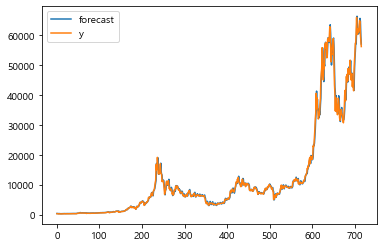

In [115]:
fig = model_fit.plot_predict()

In [116]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([55768.34814675, 56168.48969909, 57148.81145401, 57854.0785025 ,
        57734.43728109]),
 array([1338.81693399, 1927.60628553, 2434.71374804, 2884.03760807,
        3256.47014333]),
 array([[53144.31517424, 58392.38111926],
        [52390.45080308, 59946.52859511],
        [52376.86019518, 61920.76271284],
        [52201.46866063, 63506.68834438],
        [51351.87308344, 64117.00147874]]))

In [117]:
test_df = df[1373:]
test_df

,day,price
1373,2021-11-26,58935.45
1374,2021-11-29,57292.28
1375,2021-12-02,57229.76
1376,2021-12-05,49253.86
1377,2021-12-08,50645.41


In [118]:
pred_y = forecast_data[0].tolist()   # 마지막 5일 예측데이터
test_y = test_df.price.values   # 실제 5일 데이터
pred_y_lower = []  # 마지막 5일의 예측 데이터 최소값
pred_y_upper = []  # 마지막 5일의 예측 데이터 최대값

In [119]:
forecast_data[2]

array([[53144.31517424, 58392.38111926],
       [52390.45080308, 59946.52859511],
       [52376.86019518, 61920.76271284],
       [52201.46866063, 63506.68834438],
       [51351.87308344, 64117.00147874]])

In [120]:
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

In [121]:
pred_days = test_df.day.values
pred_days

array(['2021-11-26', '2021-11-29', '2021-12-02', '2021-12-05',
       '2021-12-08'], dtype=object)

In [122]:
plt.rcParams['font.family'] = 'Malgun Gothic'

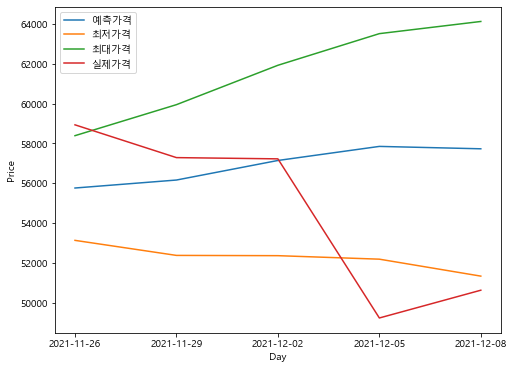

In [126]:
plt.figure(figsize=(8,6))
plt.xlabel('Day')
plt.ylabel('Price')
plt.plot(pred_days, pred_y)  # 예측가격
plt.plot(pred_days, pred_y_lower)  # 최저가격
plt.plot(pred_days, pred_y_upper)  # 최대가격
plt.plot(pred_days, test_y)  # 실제가격
plt.legend(['예측가격','최저가격','최대가격','실제가격'])
plt.show()

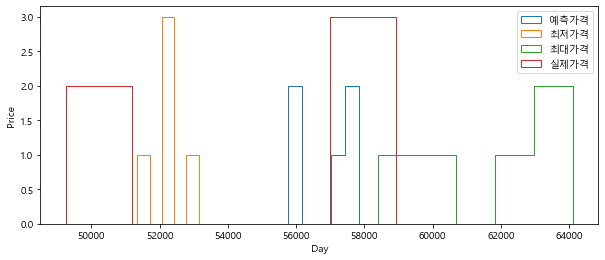

In [124]:
plt.figure(figsize=(10,4))
plt.xlabel('Day')
plt.ylabel('Price')
plt.hist(pred_y, bins=5, histtype='step')  # 예측가격
plt.hist(pred_y_lower, bins=5, histtype='step')  # 최저가격
plt.hist(pred_y_upper, bins=5, histtype='step')  # 최대가격
plt.hist(test_y, bins=5, histtype='step')  # 실제가격
plt.legend(['예측가격','최저가격','최대가격','실제가격'])
plt.show()

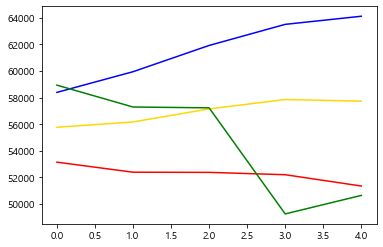

In [125]:
plt.plot(pred_y, color='gold')   # 예측가격
plt.plot(pred_y_lower, color = 'red')  # 최저가격
plt.plot(pred_y_upper, color = 'blue') # 최대가격
plt.plot(test_y, color='green') # 실제가격